In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Generate data:

In [20]:
np.random.seed(5032024)
mu = [np.array([1, 1, 1]), np.array([5, 5, 5])] # means
sig = [np.array([[1, 0, 0], # cov matrixes
                 [0, 1, 0],
                 [0, 0, 1]]), np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]])]
data_per_cluster=[2000000, 100000] # number of observations per cluster
output_filename = "output.csv"

X=0
for i in range(len(mu)):
  if i == 0:
    data = np.random.multivariate_normal(mu[i], sig[i], data_per_cluster[i])
  else:
    data = np.vstack([data, np.random.multivariate_normal(mu[i], sig[i], data_per_cluster[i])])

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## Plot the dataset to check if it's ok:

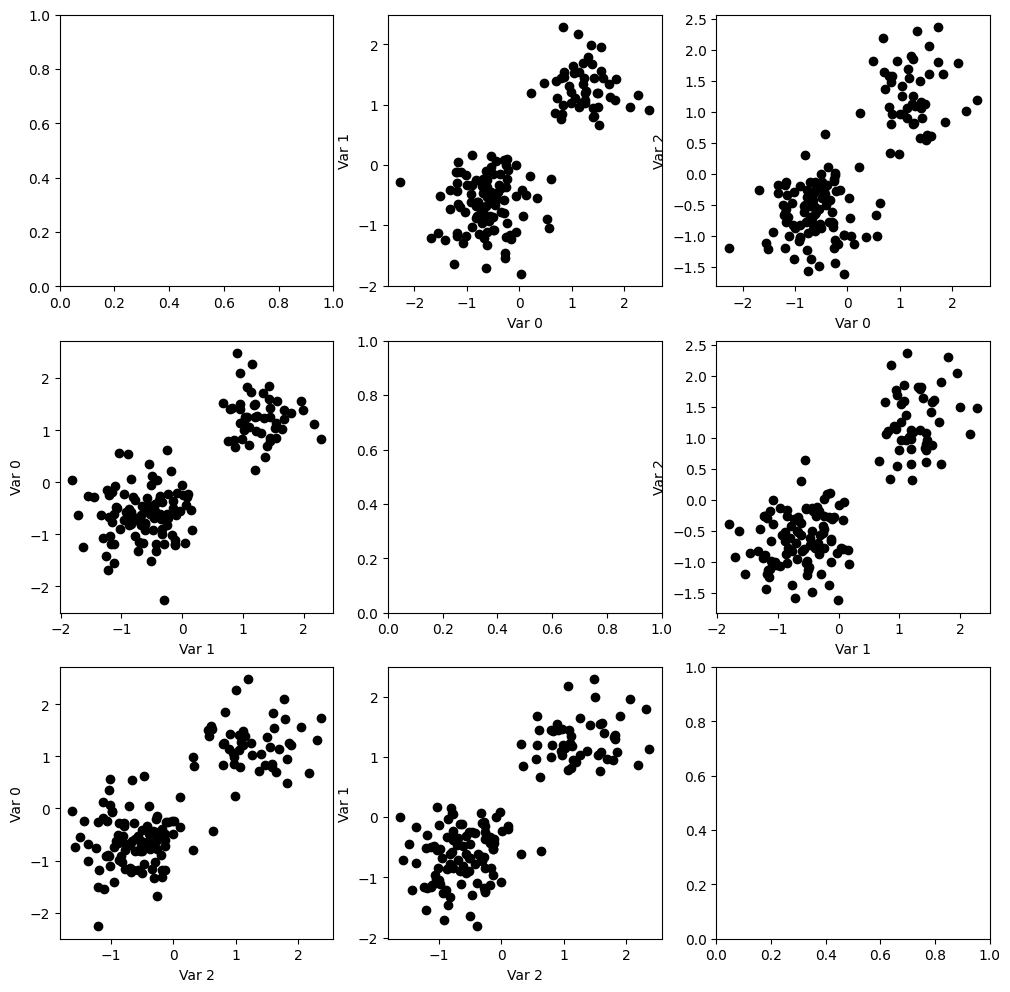

In [3]:
# Plot results
n = len(mu[0])
fig, axes = plt.subplots(n, n, figsize=(12, 12))

for i in range(n):
  for j in range(n):
    if i != j:
     axes[i][j].scatter(data_scaled[:,i], data_scaled[:,j], color='black', marker='o') # plot the data
     axes[i][j].set_xlabel('Var '+str(i))
     axes[i][j].set_ylabel('Var '+str(j))


## Save the dataset:

In [4]:
# Save the dataset
rows, cols = data_scaled.shape
with open(output_filename, "w") as f:
    # write row/col info
    # f.write(f"{rows},{cols}\n")
    f.write("Feature1,Feature2,Feature3\n") # file header
    np.savetxt(f, data_scaled, delimiter=",", fmt="%s")

## To generate multiple dataset at once

In [7]:
mu = [np.array([1, 1, 1]), np.array([5, 5, 5])] # means
sig = [np.array([[1, 0, 0], # cov matrixes
                 [0, 1, 0],
                 [0, 0, 1]]), np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]])]
point_per_dataset = [[50000,50000],[100000,100000],[150000,150000],[200000,200000],[250000,250000],[300000, 300000]]
for j in range(len(point_per_dataset)):
    np.random.seed(5032024)
    print(j)
    data_per_cluster=point_per_dataset[j]
    output_filename = "output"+str(data_per_cluster[0]+data_per_cluster[1])+".csv"

    X=0
    for i in range(len(mu)):
        if i == 0:
            data = np.random.multivariate_normal(mu[i], sig[i], data_per_cluster[i])
        else:
            data = np.vstack([data, np.random.multivariate_normal(mu[i], sig[i], data_per_cluster[i])])

    # Standardize the dataset
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    # Save the dataset
    rows, cols = data_scaled.shape
    with open(output_filename, "w") as f:
        header = ""
        for i in range(cols-1):
            header = header+("Feature"+str(i)+", ") # file header
        header = header+("Feature"+str(cols))
        f.write(header+"\n")
        np.savetxt(f, data_scaled, delimiter=",", fmt="%s")

0
1
2
3
4
5
